<a href="https://colab.research.google.com/github/katerinakazantseva/scientific_python/blob/master/HW2_MPI_Quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hi everybody!###



Today we are going to simulate the first MS spectrum for any predetermined peptide with a specific charge.

Looking ahead, I can say that our code will allow us to analyze not only the behavior of peptides, but also we will be able to simulate the results for Top-Down proteomics. And this is already quite serious!

[Link](https://forms.gle/qSLAAbsb68sWkaM86) to the google.form for answering questions.

The program code is located here.

Maximum grade: 15 scores



---



In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

First of all, let's make a dictionary that will allow us to determine molecular formulas by the one-letter representation of amino acids. Note that hydrated molecular formulas are presented here.

Fill out the information about methionine and tryptophan.

In [ ]:
aa2formula = {
    'A': {'C': 3, 'H': 7, 'N': 1, 'O': 2},
    'R': {'C': 6, 'H': 14, 'N': 4, 'O': 2},
    'N': {'C': 4, 'H': 8, 'N': 2, 'O': 3},
    'D': {'C': 4, 'H': 7, 'N': 1, 'O': 4},
    'C': {'C': 3, 'H': 7, 'N': 1, 'O': 2, 'S': 1},
    'Q': {'C': 5, 'H': 10, 'N': 2, 'O': 3},
    'E': {'C': 5, 'H': 9, 'N': 1, 'O': 4},
    'G': {'C': 2, 'H': 5, 'N': 1, 'O': 2},
    'H': {'C': 6, 'H': 9, 'N': 3, 'O': 2},
    'I': {'C': 6, 'H': 13, 'N': 1, 'O': 2},
    'L': {'C': 6, 'H': 13, 'N': 1, 'O': 2},
    'K': {'C': 6, 'H': 14, 'N': 2, 'O': 2},
    'M': {'C': 5, 'H': 11, 'N': 1, 'O': 2, 'S': 1},
    'F': {'C': 9, 'H': 11, 'N': 1, 'O': 2},
    'P': {'C': 5, 'H': 9, 'N': 1, 'O': 2},
    'S': {'C': 3, 'H': 7, 'N': 1, 'O': 3},
    'T': {'C': 4, 'H': 9, 'N': 1, 'O': 3},
    'W': {'C': 11, 'H': 12, 'N': 2, 'O': 2}, 
    'Y': {'C': 9, 'H': 11, 'N': 1, 'O': 3},
    'V': {'C': 5, 'H': 11, 'N': 1, 'O': 2},
}

Next, let's write a function that returns the molecular formula (dictionary like `atom` -> `count`) from the amino acid sequence.

Note that we are subtracting a certain amount of hydrogen and oxygen from the formula, because in the protein synthesis reaction, one molecule of water is released for each amino acid addition.

In [ ]:
def get_mol_formula(seq):
    formula = {'C': 0, 'H': 0, 'N': 0, 'O': 0, 'S': 0}
    for i in seq:
      for j in ['C', 'H', 'N', 'O','S']:
        try:
         formula[j]=formula[j]+aa2formula[i][j]
        except: pass
    formula['H']=formula['H']-(len(seq)-1)*2
    formula['O']=formula['O']-(len(seq)-1)
    return formula




In [ ]:
get_mol_formula('MFV')

{'C': 19, 'H': 29, 'N': 3, 'O': 4, 'S': 1}

Amino acids are made up of carbon, hydrogen, oxygen, nitrogen, and sulfur atoms. You can ask about phosphorus - for example, phosphorylation - but we will not consider such cases.

Let's create a dictionary that contains information about the masses of isotopes of the listed atoms ([Relative Atomic Mass](https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-column-descriptions#relative)) and their occurrence ([Representative Isotopic Composition](https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-column-descriptions#comp)). A list of lists consisting of two values - mass and occurrence.

For our task, it is important to indicate a very precise value of the mass of isotopes. The occurrence should be reported as a cumulative distribution function.

Specify values for oxygen and nitrogen.

This [link](https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl) might be helpful. Use numbers from the table without rounding and without a period.

In [ ]:
atom2mass_comp = {
    'C': [
        [12.0,            0.9893],
        [13.00335483507,  1.0]
    ],
    'H': [
        [1.00782503223, 0.999885],
        [2.01410177812, 1.0]
    ],
    'O': [
         [ 15.99491461957,  0.99757],
          [ 16.99913175650,  0.997944],
        [17.99915961286,  1.0]
    ],
    'N': [
         [ 14.00307400443,  0.99636],
        [  15.00010889888,   1.0]
    ],
    'S': [
        [31.9720711744, 0.9499],
        [32.9714589098, 0.9574],
        [33.967867004,  0.9999],
        [35.96708071,   1.0]
    ]
}

As a check, let's run the following function, which calculates the mass and probability of a monoisotopic (i.e., sequence without isotopes) peptide *GNVEEQTDALTITHFK* with a charge of 1+.

In [ ]:
def get_mass_mol_formula(formula):
    return sum([i * atom2mass_comp[atom][0][0] for atom, i in formula.items()])

In [ ]:
sequence = "GNVEEQTDALTITHFK"
formula = get_mol_formula(sequence)
print(formula)
m = get_mass_mol_formula(get_mol_formula(sequence))
p = np.prod([atom2mass_comp[atom][0][1] ** i for atom, i in formula.items()])
print("mass: ", round(m, 3))
print("prob: ", round(p, 3))
assert (str(round(m, 3)) == "1801.885"), "not correct mass"
assert (str(round(p, 3)) == "0.369"), "not correct probability"

{'C': 78, 'H': 123, 'N': 21, 'O': 28, 'S': 0}
mass:  1801.885
prob:  0.369


That is, now we can calculate the mass of a monoisotopic peptide, but what if we want to calculate the mass of a peptide with a C13 isotope in a certain position or with several isotopes.

For example, let's calculate the mass of a hypothetical peptide in which 1 out of 78 carbon atoms is an isotope C13, 2 out of 123 hydrogen are deuterium, etc.

Let's write the corresponding function

In [ ]:
def get_mass_isotopic_formula(isotopic_formula):
    mass = 0.0
    for atom, counts in isotopic_formula.items():
        for i in range(len(counts)):
            mass +=counts[i]*atom2mass_comp[atom][i][0]     
    return mass

isotopic_formula = {
    'C': [77, 1], # 77 isotopes of С12 and 1 isotope of С13
    'H': [121, 2],
    'O': [26, 1, 1], # 26 isotopes of O16, 1 isotope of O17 и 1 isotope of O18
    'N': [20, 1],
    'S': [1, 0, 1, 0]
}
mass = get_mass_isotopic_formula(isotopic_formula)
print("mass: ", round(mass, 3))
assert (str(round(mass, 3)) == "1874.846"), "not correct mass"

mass:  1874.846


Excellent! It remains to generate a large number of peptides with a certain sequence, but with a random distribution of isotopes in accordance with the probabilities from the *atom2mass_comp* dictionary. That is, we want to create a function that receives the peptide sequence, its charge and the number of molecules that we want to generate.

This function then creates a *isotopic_formula*, which indicates the number of different isotopes, and finds the mass of such a molecule.

We add the resulting mass and isotopic formula to the *mass2count* dictionary, in which we count how many times a given molecule has encountered a given mass. Then we return the resulting dictionary.

Complete this code.

In [ ]:
def get_mass_counts(seq, charge, num_molecules=10000):
    random.seed(12345)
    mono_isotopic_formula = get_mol_formula(seq)
    mass2count = {}
    for i in range(num_molecules):
        isotopic_formula = {atom: [0 for cnt in cnts] for atom, cnts in atom2mass_comp.items()}
        for atom, v in mono_isotopic_formula.items():
            d = atom2mass_comp[atom]
            for j in range(v):
                r = random.random()
                ind = 0
                while d[ind][1] <= r:
                    ind += 1
                isotopic_formula[atom][ind] += 1

        
        mass = get_mass_isotopic_formula(isotopic_formula)/charge
        # TODO calculate the mass of the obtained isotope formula and do not forget to divide this mass by the charge
        if mass in mass2count:
            mass2count[mass][0] += 1
        else:
            mass2count[mass] = [1, isotopic_formula]
    return mass2count

Let's try to test the written function using the example of a peptide with the sequence *GNVEEQTDALTITHFK* and charge *3+*

In [ ]:
seq = "GNVEEQTDALTITHFK"
charge = 3
mass_counts = {k: v[0] for k, v in get_mass_counts(seq, charge).items()}
print("mono isotopic mass: " + str(get_mass_mol_formula(get_mol_formula(seq))/charge))
for key, value in sorted(mass_counts.items(), key=lambda item: item[1], reverse=True)[:5]:
    print("%s: %s" % (key, value))

mono isotopic mass: 600.6282141350933
600.6282141350933: 3743
600.9626657467834: 3073
601.2971173584734: 1284
601.6315689701634: 356
600.96055909991: 310


That is, the most frequent peptide is the mono isotope variant, but, as you can see, the second most frequent molecule is only slightly behind the mono isotopic variant in frequency. Moreover, we can, by simple calculations, guess about the isotopic composition of such a peptide

In [ ]:
mono_mass = get_mass_mol_formula(get_mol_formula(seq))/charge
print((mono_mass*charge-atom2mass_comp['C'][0][0]+atom2mass_comp['C'][1][0])/3)

600.9626657467833


**Question 1** - in the [google.form](https://forms.gle/qSLAAbsb68sWkaM86)

In [ ]:
mono_mass = get_mass_mol_formula(get_mol_formula(seq))/charge
mass=601.2971173584734
min=mass
for i in ['C','O','H', 'S','N']:
  for j in range(len(atom2mass_comp[i])):  
   diff=abs(mass-((mono_mass*charge-atom2mass_comp[i][0][0]+atom2mass_comp[i][j][0])/3))
   if diff<min:
    min=diff
    atom=i
    ist=j
print (str(atom)+" isotope "+ str(ist))





O isotope 2


**Question 2** - in the [google.form](https://forms.gle/qSLAAbsb68sWkaM86)

In [ ]:
seq='R'
n=0
mass_counts = {k: v[0] for k, v in get_mass_counts(seq, charge).items()}

while get_mass_mol_formula(get_mol_formula(seq))/charge!=sorted(mass_counts.items(), key=lambda item: item[1], reverse=True)[1][0]:
 seq=seq+'R'
 mass_counts = {k: v[0] for k, v in get_mass_counts(seq, charge).items()}
 n=n+1

print(n)



16




---



The final step is to write some code to visualize the results of our simulations and to make some very interesting observations.

For this we need two additional functions.

*   ***get_fwhm_sd*** is taking two parameters - mass per charge and resolution - returns the value of the standard deviation of the intensity distribution of the molecule. This formula allows you to link two terms - [FWHM](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) (or half width), which is very much loved by all analytical chemists, and standard deviation. More details can be found [here](https://ned.ipac.caltech.edu/level5/Leo/Stats2_3.html).
*   ***f*** pretty encrypted name, isn't it? This function calculates the intensity value on the spectrum plot, going over all the molecules and adding their distributions with a certain mass (average value) and variance (FWHM resolution, which we converted to standard deviation) and also multiplied by the number of generated molecules. Uuuuh!



In [ ]:
def get_fwhm_sd(mz, resolution):
    return mz / (resolution * (2 * (2 * math.log(10)) ** 0.5))

def f(x, parameters, resolution):
    return sum([v[0] * norm.pdf(x, k, get_fwhm_sd(k, resolution)) for k, v in parameters.items()])

Now let's move on to the final stage - building the MS1 spectrum. We will be iteratively improving this feature, which is why I named it
***plot_peptide_v1***. 

In [ ]:
def plot_peptide_v1(seq, charge, resolution, num_molecules=10000):
    mass_counts = get_mass_counts(seq, charge, num_molecules)
    minx = min(mass_counts.keys()) - 0.5
    maxx = max(mass_counts.keys()) + 0.5
    x = np.linspace(minx, maxx, 100000)
    fig, ax = plt.subplots(len(resolution) + 1, 1, figsize=(8, 3*(len(resolution) + 1)))
    for i in range(len(resolution)):
        y = f(x, mass_counts, resolution[i])
        ax[i].text(0.05, 0.95, str(resolution[i]), transform=ax[i].transAxes, 
                   fontsize=12, verticalalignment='top')
        ax[i].get_yaxis().set_visible(False)
        ax[i].plot(x, y)
    ax[len(resolution)].set_axis_off()
    plt.tight_layout()
    plt.show()

Let's construct MS1 spectrum for peptide *GNVEEQTDALTITHFK* with charge *3+* for different resolutions.

In [ ]:
seq = "GNVEEQTDALTITHFK"
charge = 3
resolution = [1000, 10000, 100000, 1000000]
plot_peptide_v1(seq, charge, resolution)

Remember I spoke at the lesson about neutron coding (I raised this topic during a conversation about the capabilities of modern mass analyzers to distinguish which isotopes are located in peptides - C13C13 or, say, O18), but in order to see this effect, we must be able to build a plot within a smaller window along the OX axis. Therefore, we will add two additional parameters - *minx* and *maxx*, the minimum and maximum values along the OX axis, respectively.

In [ ]:
def plot_peptide_v2(seq, charge, resolution, minx=float('nan'), maxx=float('nan'), num_molecules=10000):
    mass_counts = get_mass_counts(seq, charge, num_molecules)
    if math.isnan(minx) or math.isnan(maxx):
        minx = min(mass_counts.keys()) - 0.5
        maxx = max(mass_counts.keys()) + 0.5
    x = np.linspace(minx, maxx, 100000)
    fig, ax = plt.subplots(len(resolution) + 1, 1, figsize=(8, 3*(len(resolution) + 1)))
    for i in range(len(resolution)):
        y = f(x, mass_counts, resolution[i])
        ax[i].text(0.05, 0.95, str(resolution[i]), transform=ax[i].transAxes, fontsize=12,
                   verticalalignment='top')
        ax[i].get_yaxis().set_visible(False)
        ax[i].plot(x, y)        
    ax[len(resolution)].set_axis_off()
    plt.tight_layout()
    plt.show()

In [ ]:
seq = "GNVEEQTDALTITHFK"
charge = 3
resolution = [100000, 1000000]
mono_mass = get_mass_mol_formula(get_mol_formula(seq))
window = 0.02
print("Whole isotopic pattern")
plot_peptide_v2(seq, charge, resolution)
print("Mono isotopic peak")
plot_peptide_v2(seq, charge, resolution, minx=(mono_mass-window+0)/charge, maxx=(mono_mass+window+0)/charge)
print("Single isotopic peak")
plot_peptide_v2(seq, charge, resolution, minx=(mono_mass-window+1)/charge, maxx=(mono_mass+window+1)/charge)
print("Double isotopic peak")
plot_peptide_v2(seq, charge, resolution, minx=(mono_mass-window+2)/charge, maxx=(mono_mass+window+2)/charge)
print("Triple isotopic peak")
plot_peptide_v2(seq, charge, resolution, minx=(mono_mass-window+3)/charge, maxx=(mono_mass+window+3)/charge)

Obviously, at 100k (Orbitrap working resolution), it is impossible to distinguish the neutron coding peaks, but at higher resolutions these peaks become distinguishable.

There remains only one problem - how to understand from which isotope a particular peak was obtained? Let's add additional vertical lines to represent the most common molecules.

In [ ]:
def plot_peptide_v3(seq, charge, resolution, minx=float('nan'), maxx=float('nan'), plot_labels=False, num_molecules=10000):
    mass_counts = get_mass_counts(seq, charge, num_molecules)
    mono_mass = get_mass_mol_formula(get_mol_formula(seq)) / charge
    if math.isnan(minx) or math.isnan(maxx):
        minx = min(mass_counts.keys()) - 0.5
        maxx = max(mass_counts.keys()) + 0.5
    x = np.linspace(minx, maxx, 100000)
    fig, ax = plt.subplots(len(resolution) + 1, 1, figsize=(8, 3*(len(resolution) + 1)))
    for i in range(len(resolution)):
        y = f(x, mass_counts, resolution[i])
        ax[i].text(0.05, 0.95, str(resolution[i]), transform=ax[i].transAxes, fontsize=12,
                   verticalalignment='top')
        ax[i].get_yaxis().set_visible(False)
        ax[i].plot(x, y)
    if plot_labels: # a bit clumsy, sorry
        masses = []
        values = []
        labels = []
        if minx <= mono_mass <= maxx:
            masses.append(mono_mass)
            values.append(float("inf"))
            labels.append("monoisotopic")
        for k, v in mass_counts.items():
            if k < minx or k > maxx or k == mono_mass: continue
            l = []
            for atom, cnt in v[1].items():
                for i in range(1, len(cnt)):
                    if cnt[i] == 0: continue
                    for j in range(cnt[i]):
                        l.append(atom + str(i))
            masses.append(k)
            values.append(v[0])
            labels.append(";".join(l))
        values, masses, labels = zip(*sorted(zip(values, masses, labels), reverse=True)[:5])
        colors = plt.cm.get_cmap("hsv", len(values) + 1)
        for i in range(len(masses)):
            ax[len(resolution)-1].axvline(x=masses[i], label=labels[i], c=colors(i))
        ax[len(resolution)-1].legend()
    ax[len(resolution)].set_axis_off()
    plt.tight_layout()
    plt.show()

We now have all the functionality to learn neutron coding. Let's build a spectrum for peptide *GNVEEQTDALTITHFK* and see the description of the peaks.

In [ ]:
seq = "GNVEEQTDALTITHFK"
charge = 3
resolution = [100000, 1000000]
mono_mass = get_mass_mol_formula(get_mol_formula(seq))
window = 0.02
print("Whole isotopic pattern")
plot_peptide_v3(seq, charge, resolution, plot_labels=True)
print("Mono isotopic peak")
plot_peptide_v3(seq, charge, resolution, minx=(mono_mass-window+0)/charge, maxx=(mono_mass+window+0)/charge, plot_labels=True)
print("Single isotopic peak")
plot_peptide_v3(seq, charge, resolution, minx=(mono_mass-window+1)/charge, maxx=(mono_mass+window+1)/charge, plot_labels=True)
print("Double isotopic peak")
plot_peptide_v3(seq, charge, resolution, minx=(mono_mass-window+2)/charge, maxx=(mono_mass+window+2)/charge, plot_labels=True)
print("Triple isotopic peak")
plot_peptide_v3(seq, charge, resolution, minx=(mono_mass-window+3)/charge, maxx=(mono_mass+window+3)/charge, plot_labels=True)

In particular, it was this code that was used to plot the 3A graph from [this article](https://www.annualreviews.org/doi/full/10.1146/annurev-biodatasci-080917-013516).

In [ ]:
seq = "GNVEEQTDALTITHFK"
charge = 3
resolution = [1000, 100000, 1000000]
mono_mass = get_mass_mol_formula(get_mol_formula(seq))
window = 0.02
print("Double isotopic peak")
plot_peptide_v3(seq, charge, resolution, minx=(mono_mass-window+2)/charge, maxx=(mono_mass+window+2)/charge, plot_labels=True)

**Question 3** - in the [google.form](https://forms.gle/qSLAAbsb68sWkaM86)



---



Top-down proteomics, bypassing the stage of proteins proteolysis into peptides, analyzes proteins directly. Let's try to make a spectrum for a whole protein, for example, for an antibody.

By the way, top-down proteomics of antibodies is actively used in pharmaceuticals to the quality-control (QC) of the production of drugs based on them. For example, the medicine [Adalimumab](https://en.wikipedia.org/wiki/Adalimumab) is used to treat a wide range of diseases, including arthritis. The amino acid sequence of this antibody can be found at [link](https://www.drugbank.ca/drugs/DB00051).

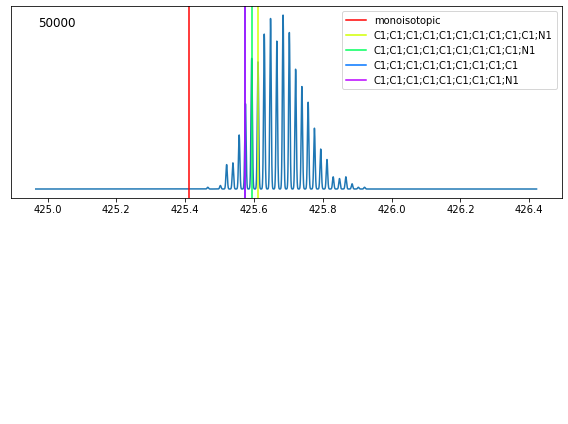

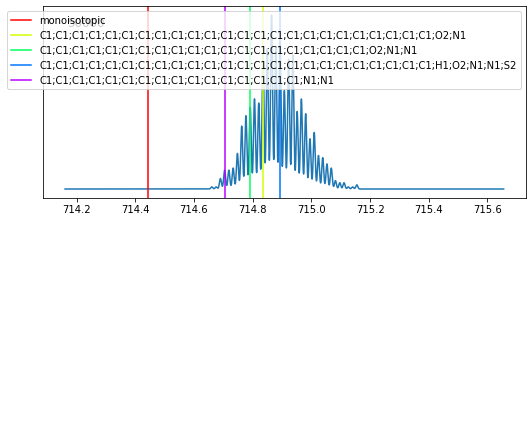

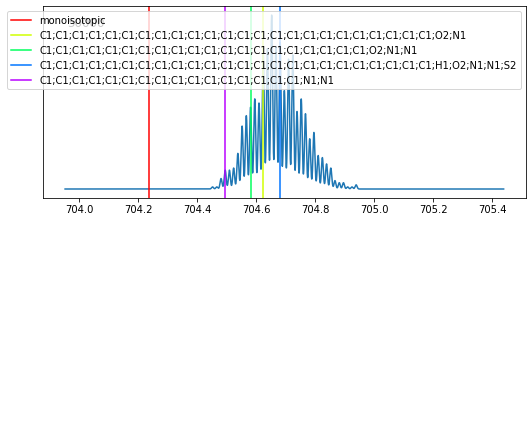

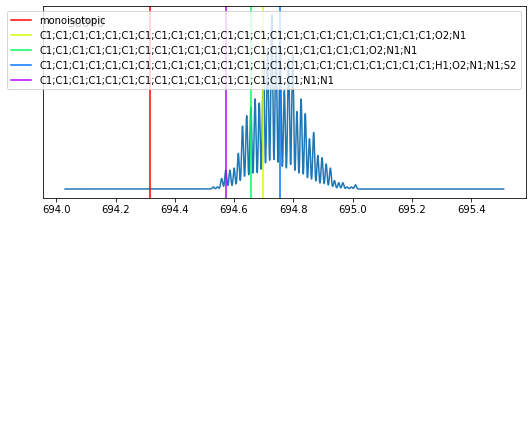

In [42]:
adalimumab_light_chain = \
    "DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKLLIYAASTLQSGVPS" \
    "RFSGSGSGTDFTLTISSLQPEDVATYYCQRYNRAPYTFGQGTKVEIKRTVAAPSVFIFPP" \
    "SDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLT" \
    "LSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC"

adalimumab_heavy_chain = \
    "EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLEWVSAITWNSGHIDY" \
    "ADSVEGRFTISRDNAKNSLYLQMNSLRAEDTAVYYCAKVSYLSTASSLDYWGQGTLVTVS" \
    "SASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQS" \
    "SGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDKTHTCPPCPAPELLG" \
    "GPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQY" \
    "NSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRD" \
    "ELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSR" \
    "WQQGNVFSCSVMHEALHNHYTQKSLSLSPGK"

resolution = [50000]

plot_peptide_v3(adalimumab_light_chain, 55, resolution, plot_labels=True, num_molecules=1000)
# build the same but for several charges
plot_peptide_v3(adalimumab_heavy_chain, 69, resolution, plot_labels=True, num_molecules=1000)
plot_peptide_v3(adalimumab_heavy_chain, 70, resolution, plot_labels=True, num_molecules=1000)
plot_peptide_v3(adalimumab_heavy_chain, 71, resolution, plot_labels=True, num_molecules=1000)


**Question 4** - in the [google.form](https://forms.gle/qSLAAbsb68sWkaM86)

As you can see, the peak of the monoisotopic protein is located far enough from the main distribution, which greatly complicates the task of determining the mass of the initial uncharged protein.

In the case of the heavy chain, the specified resolution becomes completely insufficient to separate the isotopic peaks.

A large number of modifications (including [disulfide bridges](https://en.wikipedia.org/wiki/Disulfide)), their combinatorics, different charges of proteins, a mixture of several proteins, large cross-sections are all factors that we did not take into account in our model, and this is only the tip of the iceberg of the complexity of Top-down proteomics analysis.

In [51]:
sequence = adalimumab_heavy_chain
formula = get_mol_formula(sequence)
print(formula)
m = get_mass_mol_formula(get_mol_formula(sequence))
print(m)

{'C': 2197, 'H': 3404, 'N': 584, 'O': 678, 'S': 15}
49296.564807982504
